# UoE RL Course: Lab - PyTorch Demo

In this lab session, we will give you a brief introduction into PyTorch. PyTorch is widely used library for deep learning.

## PyTorch Basics

### Tensors

At the heart of PyTorch and similar libraries are tensors. Think of a tensor as an arbitrarily-dimensional matrix. These tensors are used to apply various operations and most objects we apply operations on within PyTorch will be tensors.

There are multiple ways of creating tensors.

In [1]:
# import necessary libraries
import torch
import torchvision
import numpy as np

In [2]:
# Create a specific tensor
t1 = torch.tensor(
    [
        [1., -1.],
        [1., -1.]
    ]
)

t2 = torch.tensor(np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
))

In [3]:
# shapes of tensors show the dimensionality:
print(t1.shape)
print(t1)

torch.Size([2, 2])
tensor([[ 1., -1.],
        [ 1., -1.]])


In [4]:
print(t2.shape)
print(t2)

torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [5]:
# create tensor of specific shape with all 0s
t_zeros = torch.zeros((2, 3, 2))
print(t_zeros.shape)
print(t_zeros)

torch.Size([2, 3, 2])
tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])


In [6]:
# create tensor of specific shape with all 1s
t_ones = torch.ones((2, 2))
print(t_ones.shape)
print(t_ones)

torch.Size([2, 2])
tensor([[1., 1.],
        [1., 1.]])


### Reshaping

In [7]:
# create tensors of specific shape with values from normal distribution with mean 0 and variance 1
t_random = torch.randn((3, 2, 2))
print(t_random.shape, t_random)

t_random = t_random.view(6, 2)
print(t_random.shape, t_random)

torch.Size([3, 2, 2]) tensor([[[-0.0981,  1.6531],
         [-0.6422,  0.5587]],

        [[ 0.8772,  0.4926],
         [-0.1100, -1.3531]],

        [[-1.4381, -1.1567],
         [ 0.3895,  1.1590]]])
torch.Size([6, 2]) tensor([[-0.0981,  1.6531],
        [-0.6422,  0.5587],
        [ 0.8772,  0.4926],
        [-0.1100, -1.3531],
        [-1.4381, -1.1567],
        [ 0.3895,  1.1590]])


### Tensor operations

In [8]:
# There are many operations which can be executed on top of tensors
# Either global ...
t_sum = t_random.sum()
print(t_sum)

# or per dimension
t_sum = t_random.sum(dim=-1)
print(t_sum)

t_mean = t_random.mean(dim=0)
print(t_mean)

tensor(0.3320)
tensor([ 1.5551, -0.0834,  1.3698, -1.4631, -2.5948,  1.5485])
tensor([-0.1703,  0.2256])


In [9]:
# We can also just calculate with them
t = torch.ones(3,2)
print(t)

# scalar multiplication
t = t * 4
print(t)

t_random = torch.randn(3,2)
print(t_random)

# addition of tensors
t = t + t_random
print(t)

t2 = torch.randn(3,2)
print(t2)

# element-wise multiplication of tensors (of same shape)
t3 = t * t2
print(t3)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[4., 4.],
        [4., 4.],
        [4., 4.]])
tensor([[ 0.5385,  0.0531],
        [-0.6123,  0.3731],
        [-0.6919,  0.2427]])
tensor([[4.5385, 4.0531],
        [3.3877, 4.3731],
        [3.3081, 4.2427]])
tensor([[0.3887, 0.5845],
        [0.7201, 0.9441],
        [0.3686, 2.1444]])
tensor([[1.7641, 2.3689],
        [2.4394, 4.1285],
        [1.2193, 9.0980]])


This covers some of the most important fundamentals of PyTorch. We strongly suggest you to have a look at the following resources of PyTorch, including detailed documentation as well as excellent introductory tutorials available about PyTorch.

### Further Resources

- **PyTorch Documentation** - https://pytorch.org/docs/stable/index.html

    PyTorch has an excellent documentation of functions implemented within the library. We encourage you to read up on functionality and make yourself more familiar with the library.



- **PyTorch Tutorials** - https://pytorch.org/tutorials/

    PyTorch provides tutorials on their webpage which explain more features of the library in further detail.
    
    Examples for good introductory tutorials:
    - Deep learning with PyTorch: A 60 Minute Blitz - https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
    - Learning PyTorch with examples - https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

## Deep learning

After talking about tensors, the objects underlying PyTorch, and some basic operations, we want to introduce you to the deep learning functionality of PyTorch.

### Defining a model
First, we have to **define a neural network** architecture. We can make use of a portfolio of pre-defined architectures or define our own operations and modules.

In [10]:
from torch import nn, Tensor
from typing import Iterable


class FCNetwork(nn.Module):
    """Fully PyTorch neural network class

    :attr input_size (int): dimensionality of input tensors
    :attr out_size (int): dimensionality of output tensors
    :attr layers (torch.nn.Module): neural network as sequential network of multiple layers
    """

    def __init__(self, dims: Iterable[int], output_activation: nn.Module = None):
        """Creates a network using ReLUs between layers and no activation at the end

        :param dims (Iterable[int]): tuple in the form of (IN_SIZE, HIDDEN_SIZE, HIDDEN_SIZE2,
            ..., OUT_SIZE) for dimensionalities of layers
        :param output_activation (nn.Module): PyTorch activation function to use after last layer
        """
        super().__init__()
        self.input_size = dims[0]
        self.out_size = dims[-1]
        
        mods = []
        for i in range(len(dims) - 2):
            mods.append(nn.Linear(dims[i], dims[i + 1]))
            mods.append(nn.ReLU())

        mods.append(nn.Linear(dims[-2], dims[-1]))
        if output_activation:
            mods.append(output_activation())
        
        self.layers = nn.Sequential(*mods)

    def forward(self, x: Tensor) -> Tensor:
        """Computes a forward pass through the network

        :param x (torch.Tensor): input tensor to feed into the network
        :return (torch.Tensor): output computed by the network
        """
        return self.layers(x)

In [11]:
import matplotlib.pyplot as plt
from torch import optim
import torch.nn.functional as F
from torch.nn.modules.activation import LogSoftmax

### Hyperparameter configuration

We define a configuration dictionary that will contain our hyperparameters

In [12]:
config = {
    "hidden_dims": (28*28, 128, 128, 10),
    "batch_size": 64,
    "lr": 3e-4,
    "log_interval": 500,
    "epochs": 20,
}

And a fully connected network with ReLU activations and a LogSoftmax output layer. You can experiment with changing the architecture above. Also, how would the loss function change if you had different output layers?

In [13]:
net = FCNetwork(config["hidden_dims"], output_activation=LogSoftmax)

In [14]:
net.train()

FCNetwork(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
    (5): LogSoftmax(dim=None)
  )
)

### Loading MNIST dataset

In [15]:
# Boilerplate that loads the MNIST dataset

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
      '~/files/',
      train=True,
      download=True,
      transform=torchvision.transforms.Compose([
          torchvision.transforms.ToTensor(),
          torchvision.transforms.Normalize((0.1307,), (0.3081,)),
          torchvision.transforms.Lambda(lambda x: torch.flatten(x))
    ])),
    batch_size=config["batch_size"], shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('~/files/', train=False, download=True,
        transform=torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize((0.1307,), (0.3081,)),
            torchvision.transforms.Lambda(lambda x: torch.flatten(x))
    ])),
    batch_size=config["batch_size"], shuffle=True
)

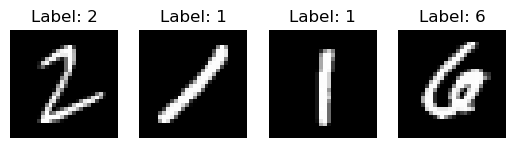

In [16]:
# get some examples from the test set
examples = enumerate(test_loader)
batch_idx, (x, y) = next(examples)

# and plot them along with their labels
fig = plt.figure()
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(x[i].reshape(28, 28), cmap='gray')
    plt.title("Label: {}".format(y[i]))
    plt.axis("off")


In [17]:
# define an optimiser. We are using Adam and we supply it with the parameters of the fully connected network we created
optimizer = optim.Adam(net.parameters(), lr=config["lr"])

### Training

We are now ready to train our model. We will be using "nll_loss" which stands for Negative Log Likelihood. The "epochs" are how many times we will iterate over all our training dataset, but the batch_size defines how many samples will pass at once through our network. We print the loss at each epoch - but should we log more things too? How can we see if gradients pass correctly through our network?

In [18]:
log_interval = config["log_interval"]
train_losses = []

for epoch in range(config["epochs"]):
    losses_epoch = []
    for batch_idx, (x, y) in enumerate(train_loader):
        optimizer.zero_grad()
        out = net(x)
        loss = F.nll_loss(out, y)
        losses_epoch.append(loss)
        loss.backward()
        optimizer.step()
    loss_mean = torch.mean(torch.Tensor(losses_epoch))
    print(f"Train Epoch: {epoch}, loss: {loss_mean}")
    train_losses.append(loss.item())
        

/home/francelico/miniconda3/envs/sb3/lib/python3.10/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Train Epoch: 0, loss: 0.37144312262535095
Train Epoch: 1, loss: 0.15935790538787842
Train Epoch: 2, loss: 0.11021707952022552
Train Epoch: 3, loss: 0.08408975601196289
Train Epoch: 4, loss: 0.06891424208879471
Train Epoch: 5, loss: 0.055737532675266266
Train Epoch: 6, loss: 0.04558186233043671
Train Epoch: 7, loss: 0.038674257695674896
Train Epoch: 8, loss: 0.032121896743774414
Train Epoch: 9, loss: 0.0270842257887125
Train Epoch: 10, loss: 0.023413997143507004
Train Epoch: 11, loss: 0.01899632252752781
Train Epoch: 12, loss: 0.01673775725066662
Train Epoch: 13, loss: 0.01426181010901928
Train Epoch: 14, loss: 0.012904437258839607
Train Epoch: 15, loss: 0.01063623372465372
Train Epoch: 16, loss: 0.009905903600156307
Train Epoch: 17, loss: 0.008941451087594032
Train Epoch: 18, loss: 0.00798572413623333
Train Epoch: 19, loss: 0.007197989150881767


After training, we can see what our network learned. We do a forward pass of some examples from the test set, and now we display the predicted value.

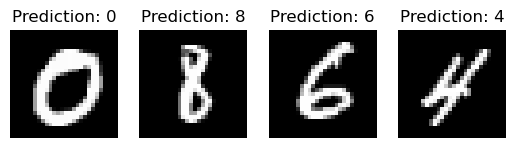

In [19]:
examples = enumerate(test_loader)
batch_idx, (x, y) = next(examples)

fig = plt.figure()
for i in range(4):
    plt.subplot(1,4,i+1)
    y = torch.argmax(net(x[i]))
    plt.imshow(x[i].reshape(28, 28), cmap='gray')
    plt.title("Prediction: {}".format(y))
    plt.axis("off")

### Measure accuracy

We can also measure the accuracy of the whole test set

In [20]:
# Measuring accuracy on the test set
test_accuracy = 0
for batch_id, (x, y) in enumerate(test_loader):
    y_pred = torch.argmax(net(x), dim=-1)
    acc = (y_pred == y).double()
    test_accuracy += torch.sum(acc) / len(test_loader.dataset)
print(test_accuracy)

tensor(0.9792, dtype=torch.float64)
